Data understanding (I dont want to make it pretty rn we can work on it in the future eventually)


In [29]:
import pandas as pd

#### This is only executed once, to convert the csv to a .parquet file that is faster to read and smaller in size 

In [30]:
#import fastparquet
#
#df = pd.read_csv("train.csv")
#df.to_parquet("train.parquet")

In [31]:

df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


I'm getting the list of attributes that have null values, so that it is easier to check on them!

In [32]:
hasNull = df.isna().any()
hasNull = hasNull[hasNull != False]
hasNull

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

I need to check on specs for each data if it is required to fill the Na values with some context specific value or just dealing with them in a different way

In [33]:
#this is gonna be fun ...

#LotFrontage     numeric, is Na [can be 0]
#Alley           categorical, means "No access"
#MasVnrType      categorical, means "None"
#MasVnrArea      numeric, is Na [can be 0]
#BsmtQual        categorical, means "No basement"
#BsmtCond        categorical, means "No basement"
#BsmtExposure    categorical, means "No basement"
#BsmtFinType1    categorical, means "No basement"
#BsmtFinType2    numeric, is Na [can be 0]
#Electrical      categorical, missing value!
#FireplaceQu     categorical, means "No fireplace"
#GarageType      categorical, means "No garage"
#GarageYrBlt     numerical, might be missing (need to check if we have garage with no year data)
#GarageFinish    categorical, means "No garage"
#GarageQual      categorical, means "No garage"
#GarageCond      categorical, means "No garage"
#PoolQC          categorical, means "No pool"
#Fence           categorical, means "No fence"
#MiscFeature     categorical, means "No other features"

#NOTEEEEEEEEEEEEEE
# those values that are related among themselves (basement, garage, pool) must be checked for consistency
#   example: if i have a garage and i have Null on garageYrBlt -> inconsistent record
#            if i dont have a garage and i have Null on garageYrBlt -> good record (need to switch category)

C:\Users\danie\AppData\Local\Temp\ipykernel_19588\2319843697.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\danie\AppData\Local\Temp\ipykernel_19588\2319843697.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


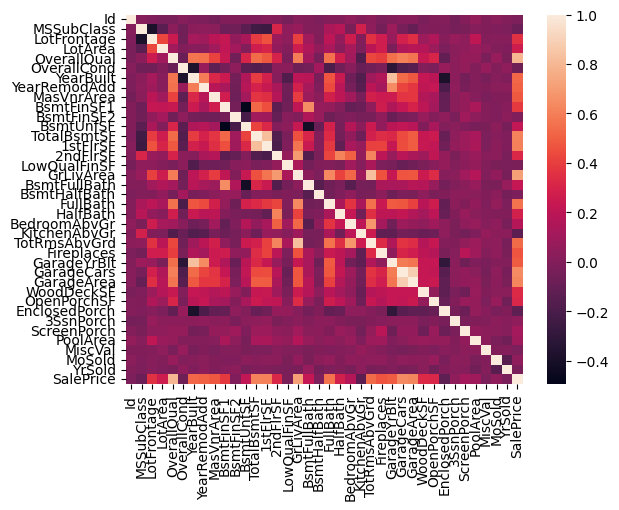

In [34]:
#plot correlatoin matrix
import seaborn as sns

corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#check for correlation with SalePrice
corr = df.corr()

In [38]:
numericalAttributes = ['LotFrontage', 'MasVnrArea','GarageYrBlt']


df['LotFrontage'] = df['LotFrontage'].fillna(0)
#Drop MasVnrArea row if it has NaN
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
#Drop GarageYrBlt row if  GarageType is NaN
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

df[numericalAttributes].isna().sum()




LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

Let's handle electrical that is a missing value because in the domain there is no description

In [41]:
print(df['Electrical'].isna().sum())
df['Electrical'].dropna(inplace=True)


1
